# Mongolia's $150,000 License Plate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('mds.mplstyle')

In [2]:
df = pd.read_csv('AuctionRecords.csv')

In [3]:
df.sample(10)

,Auction Number,Price,Bid,Name,Time,Plate
315,642,"340,550,000 ₮","1,000,000 ₮",С. С***Н,09:31:36,0001 УАР
670,287,"161,900,000 ₮","500,000 ₮",Г. Э***Г,09:08:23,0001 УАР
27,930,"422,900,000 ₮","50,000 ₮",Б. Б***А,11:05:42,0001 УАР
1174,96,"23,800,000 ₮","50,000 ₮",Д. О***Р,09:10:15,0101 УАР
791,166,"110,150,000 ₮","1,000,000 ₮",Д. Э***Л,09:02:43,0001 УАР
98,859,"416,450,000 ₮","50,000 ₮",С. Г***Р,10:32:45,0001 УАР
734,223,"135,150,000 ₮","50,000 ₮",Д. О***Р,09:04:35,0001 УАР
1098,172,"58,000,000 ₮","1,000,000 ₮",С. Л***Л,09:25:25,0101 УАР
516,441,"235,000,000 ₮","1,000,000 ₮",Х. Б***Р,09:15:44,0001 УАР
598,359,"192,000,000 ₮","50,000 ₮",Ц. Б***Ж,09:13:21,0001 УАР


In [4]:
df['Time'] = pd.to_datetime(df['Time'])

In [5]:
df['Price'] = df['Price'].str.split().str.get(0).str.replace(',', '').astype('int')

In [6]:
df['Plate'].unique()

array(['0001 УАР', '0011 УАР', '0101 УАР', '1001 УАР'], dtype=object)

In [7]:
df['Time']

0      2021-09-21 11:26:31
1      2021-09-21 11:24:37
2      2021-09-21 11:24:21
3      2021-09-21 11:24:11
4      2021-09-21 11:22:16
               ...        
1308   2021-09-21 09:00:47
1309   2021-09-21 09:00:35
1310   2021-09-21 09:00:25
1311   2021-09-21 09:00:19
1312   2021-09-21 09:00:13
Name: Time, Length: 1313, dtype: datetime64[ns]

In [8]:
df

,Auction Number,Price,Bid,Name,Time,Plate
0,957,427450000,"1,000,000 ₮",С. Г***Р,2021-09-21 11:26:31,0001 УАР
1,956,426450000,"50,000 ₮",Б. Б***А,2021-09-21 11:24:37,0001 УАР
2,955,426400000,"50,000 ₮",Н. Э***С,2021-09-21 11:24:21,0001 УАР
3,954,426350000,"50,000 ₮",С. Г***Р,2021-09-21 11:24:11,0001 УАР
4,953,426300000,"50,000 ₮",Б. Б***А,2021-09-21 11:22:16,0001 УАР
...,...,...,...,...,...,...
1308,5,1900000,"300,000 ₮",Б. Б***Н,2021-09-21 09:00:47,1001 УАР
1309,4,1600000,"50,000 ₮",Д. Г***Р,2021-09-21 09:00:35,1001 УАР
1310,3,1550000,"500,000 ₮",Б. Б***Н,2021-09-21 09:00:25,1001 УАР
1311,2,1050000,"50,000 ₮",Д. Г***Р,2021-09-21 09:00:19,1001 УАР


In [9]:
ticks = [18673.375     , 18673.39583333, 18673.41666667, 18673.4375    ,
       18673.45833333, 18673.47916667]

In [10]:
ticks[0]

18673.375

In [11]:
df[df['Plate'] == '0011 УАР']['Price'].max()

70900000

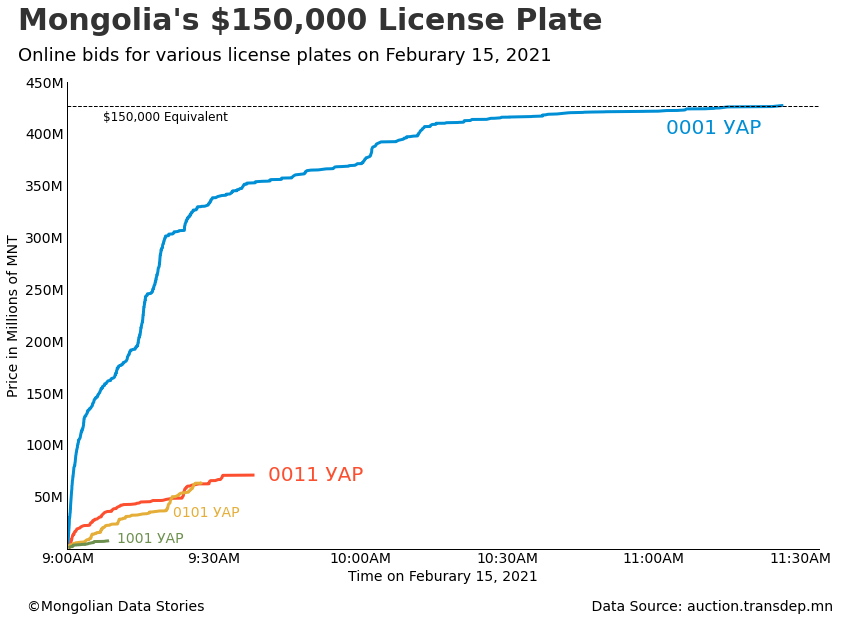

In [284]:
fig, ax = plt.subplots()
ax.plot(df[df['Plate'] == '0001 УАР']['Time'], df[df['Plate'] == '0001 УАР']['Price'] / 1000000, linewidth=3)
ax.plot(df[df['Plate'] == '0011 УАР']['Time'], df[df['Plate'] == '0011 УАР']['Price'] / 1000000, linewidth=3)
ax.plot(df[df['Plate'] == '0101 УАР']['Time'], df[df['Plate'] == '0101 УАР']['Price'] / 1000000, linewidth=3)
ax.plot(df[df['Plate'] == '1001 УАР']['Time'], df[df['Plate'] == '1001 УАР']['Price'] / 1000000, linewidth=3)

ax.set_xlabel('Time on Feburary 15, 2021')
ax.set_ylabel('Price in Millions of MNT')

ax.set_xticks(ticks)
ax.set_xticklabels(['9:00AM','9:30AM','10:00AM','10:30AM','11:00AM','11:30AM'])

ax.set_yticks(np.arange(50,500, 50))
ax.set_yticklabels(['50M','100M','150M','200M','250M','300M','350M','400M','450M'])

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position(('data', ticks[0]))

ax.set_xlim(18673.375)
ax.set_ylim(0)

ax.axhline(427350000 / 1000000, linewidth = 1, color='#000000', linestyle='--')
ax.text(x = 18673.38, y=427350000 / 1000000 - 15, s='$150,000 Equivalent', fontsize = 12, color='#000000')

ax.text(x = 18673.46, y=400, s='0001 УАР', fontsize = 20, color='#008fd5')
ax.text(x = 18673.4035, y=65, s='0011 УАР', fontsize = 20, color='#fc4f30')
ax.text(x = 18673.39, y=30, s='0101 УАР', fontsize = 14, color='#e5ae38')
ax.text(x = 18673.382, y=5, s='1001 УАР', fontsize = 14, color='#6d904f')

ax.text(x = 18673.368, y = 500, s = "Mongolia's $150,000 License Plate", fontsize=30, weight='bold', alpha=.8)
ax.text(x = 18673.368, y = 470, s= 'Online bids for various license plates on Feburary 15, 2021', fontsize=18)
ax.text(x = 18673.368, y = -60, s = '  ©Mongolian Data Stories                                                                                      Data Source: auction.transdep.mn  ', fontsize = 14, )

plt.savefig('license_plate.png', dpi = 400, bbox_inches="tight")

In [203]:
df['Time']

0      2021-02-15 11:26:31
1      2021-02-15 11:24:37
2      2021-02-15 11:24:21
3      2021-02-15 11:24:11
4      2021-02-15 11:22:16
               ...        
1308   2021-02-15 09:00:47
1309   2021-02-15 09:00:35
1310   2021-02-15 09:00:25
1311   2021-02-15 09:00:19
1312   2021-02-15 09:00:13
Name: Time, Length: 1313, dtype: datetime64[ns]